In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

clf = DecisionTreeClassifier(random_state=0)
iris = load_iris()

clf = clf.fit(iris.data, iris.target)

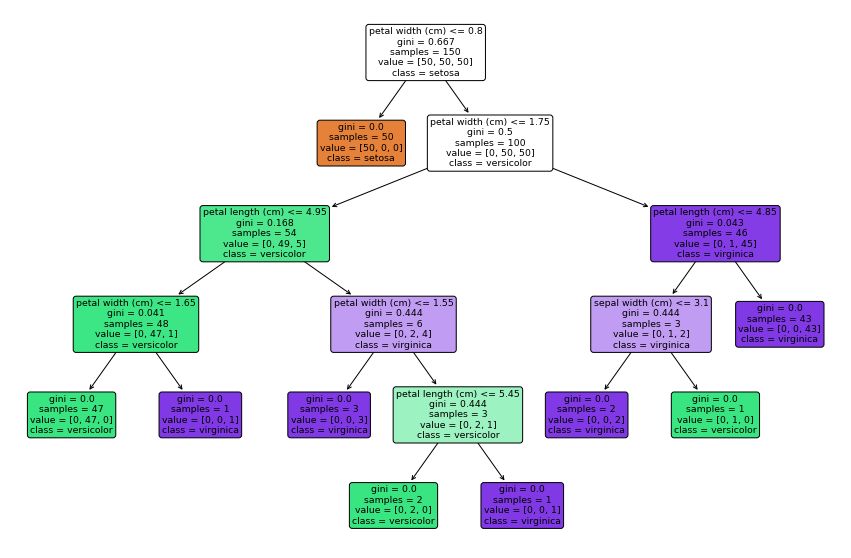

In [5]:
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, rounded=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

In [9]:
print(export_text(clf))

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



# Data Pipelines, Decision Tree

In [20]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [21]:
X, y = fetch_openml('titanic', version=1, as_frame=True, return_X_y=True)

In [22]:
X.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [27]:
numeric_features = ['age', 'fare']
numeric_transformer=Pipeline(steps = [
                             ('imputer', SimpleImputer(strategy='median')),
                             ('scaler', StandardScaler())])

categorical_features=['embarked', 'sex', 'pclass']
categorical_transformer=Pipeline(steps =[('imputer', SimpleImputer(strategy='most_frequent')),
                                         ('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor= ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),
                                              ('cat', categorical_transformer, categorical_features)])

clf = Pipeline(steps=[
                ('preprocessor', preprocessor),
                ('classifier', DecisionTreeClassifier())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf.fit(X_train, y_train)
print('Model score: %.3f', clf.score(X_test, y_test))

Model score: %.3f 0.7506361323155216
